In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


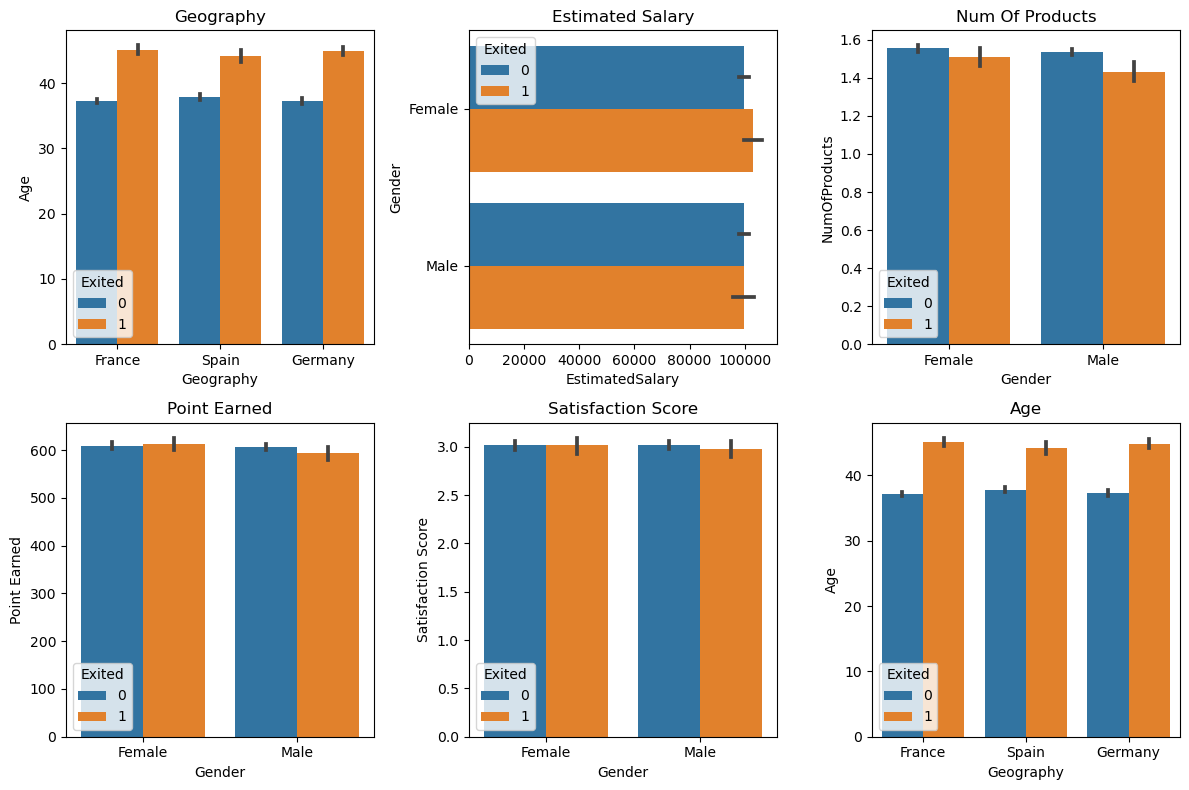

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

sns.barplot(df['Geography'], df['Age'], hue=df['Exited'], ax=axes[0, 0])
axes[0, 0].set_title('Geography')

sns.barplot(df['EstimatedSalary'], df['Gender'], hue=df['Exited'], ax=axes[0, 1])
axes[0, 1].set_title('Estimated Salary')

sns.barplot(df['Gender'], df['NumOfProducts'], hue=df['Exited'], ax=axes[0, 2])
axes[0, 2].set_title('Num Of Products')

sns.barplot(df['Gender'], df['Point Earned'], hue=df['Exited'], ax=axes[1, 0])
axes[1, 0].set_title('Point Earned')

sns.barplot(df['Gender'], df['Satisfaction Score'], hue=df['Exited'], ax=axes[1, 1])
axes[1, 1].set_title('Satisfaction Score')

sns.barplot(df['Geography'], df['Age'], hue=df['Exited'], ax=axes[1, 2])
axes[1, 2].set_title('Age')

plt.tight_layout()

plt.show()

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [5]:
# Complain variable highly correlated with the Exited target, as these are complaints at the time of churn
# For this reason, I decided not to use it.

corr_matrix = df.corr(method = 'spearman')
corr_matrix['Exited'].sort_values(ascending=False)

Exited                1.000000
Complain              0.995693
Age                   0.324012
Balance               0.111069
EstimatedSalary       0.012472
Point Earned         -0.004406
Satisfaction Score   -0.005905
CustomerId           -0.006218
HasCrCard            -0.006976
Tenure               -0.013628
RowNumber            -0.016140
CreditScore          -0.022948
NumOfProducts        -0.125026
IsActiveMember       -0.156356
Name: Exited, dtype: float64

In [6]:
X = df[['Age', 'Balance', 'IsActiveMember', 'NumOfProducts']]
y = df['Exited']

In [7]:
X.head()

,Age,Balance,IsActiveMember,NumOfProducts
0,42,0.00,1,1
1,41,83807.86,1,1
2,42,159660.80,0,3
3,39,0.00,0,2
4,43,125510.82,1,1


In [9]:
# 20,38% of Churn

np.bincount(y)

array([7962, 2038], dtype=int64)

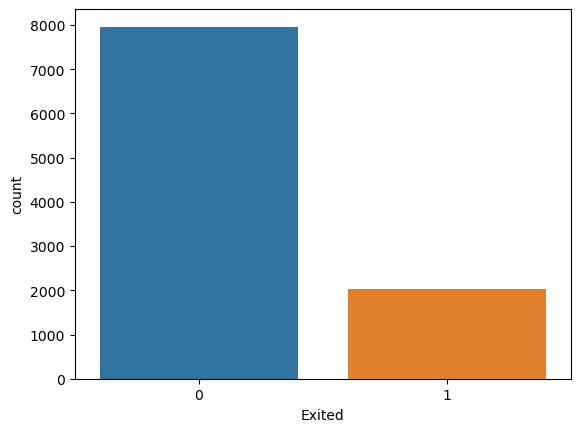

In [10]:
sns.countplot(y);

In [11]:
X = np.log1p(X)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             10000 non-null  float64
 1   Balance         10000 non-null  float64
 2   IsActiveMember  10000 non-null  float64
 3   NumOfProducts   10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


In [13]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


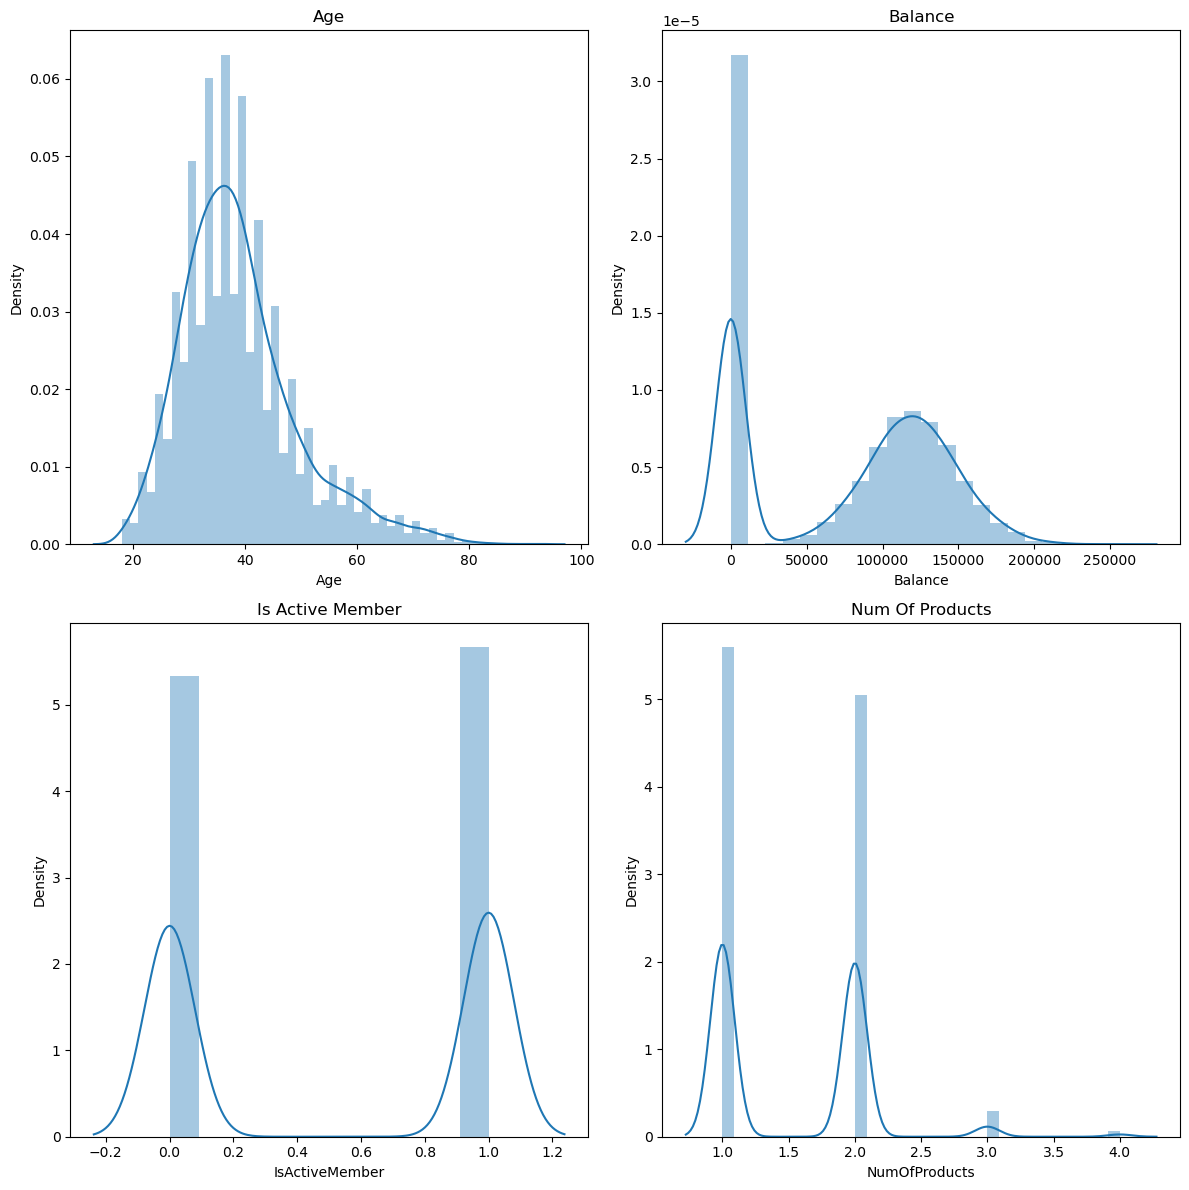

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sns.distplot(df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age')

sns.distplot(df['Balance'], ax=axes[0, 1])
axes[0, 1].set_title('Balance')

sns.distplot(df['IsActiveMember'], ax=axes[1, 0])
axes[1, 0].set_title('Is Active Member')

sns.distplot(df['NumOfProducts'], ax=axes[1, 1])
axes[1, 1].set_title('Num Of Products')


plt.tight_layout()

plt.show()

In [15]:
# Process to match the feature

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_over, y_over = smote.fit_resample(X, y)

In [16]:
# showing % balanced features

np.bincount(y_over)

array([7962, 7962], dtype=int64)

In [17]:
# showing balanced features

y_over.value_counts(normalize=True)

1    0.5
0    0.5
Name: Exited, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.6954792800334868

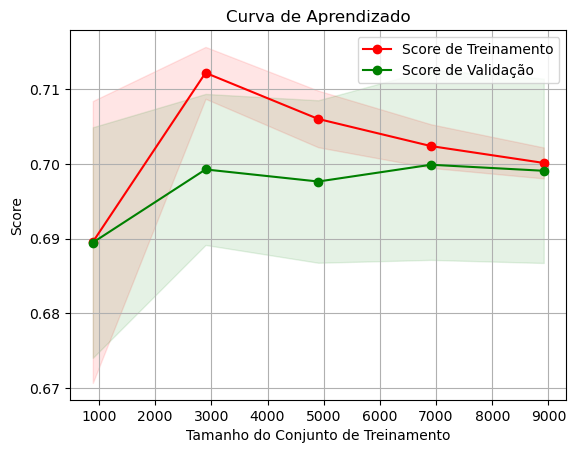

In [20]:
from sklearn.model_selection import learning_curve

X, y = X_train, y_train

model = LogisticRegression()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

# XGBClassifier

In [21]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier()

xgb_class.fit(X_train, y_train)

xgb_class_pred = xgb_class.predict(X_test)

accuracy = (xgb_class_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.856425282544998


In [22]:
from sklearn.metrics import confusion_matrix

xgb_matrix = confusion_matrix(y_true = y_test, y_pred = xgb_class_pred)

In [23]:
def plot_matrix(confusion, name, color_map):
    
    plt.figure(figsize = (7,6))
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    
    group_percentages = ["{0:.1%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    
    #Getting the labels
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    
    #Setting the labels
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels,vmax=20,annot_kws={"size": 15}, fmt='', cmap=color_map)
    ax.set_title(f'{name}\n',fontdict={'fontsize':25});
    ax.set_xlabel('\nPredicted Values',fontsize=16)
    ax.set_ylabel('Actual Values ',fontsize=16);
    
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Legitimate','Fraudulent'],fontsize=15)
    ax.yaxis.set_ticklabels(['Legitimate','Fraudulent'],fontsize=15)
    
    ## Display the visualization of the Confusion Matrix.
    plt.show()

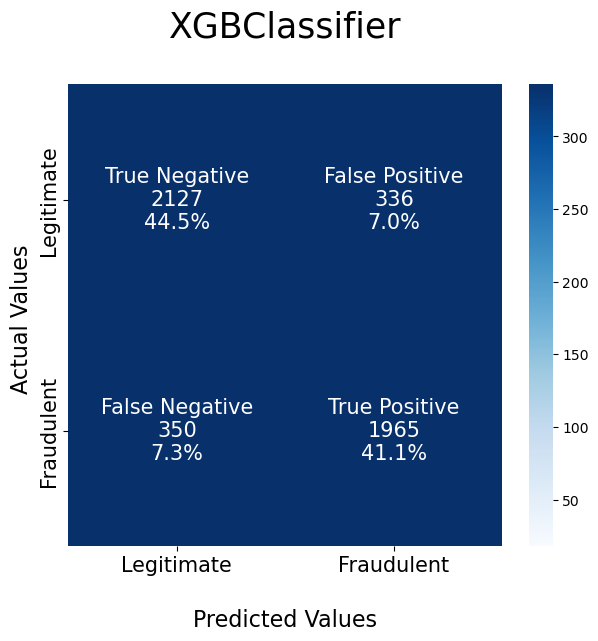

In [24]:
plot_matrix(xgb_matrix,'XGBClassifier','Blues')

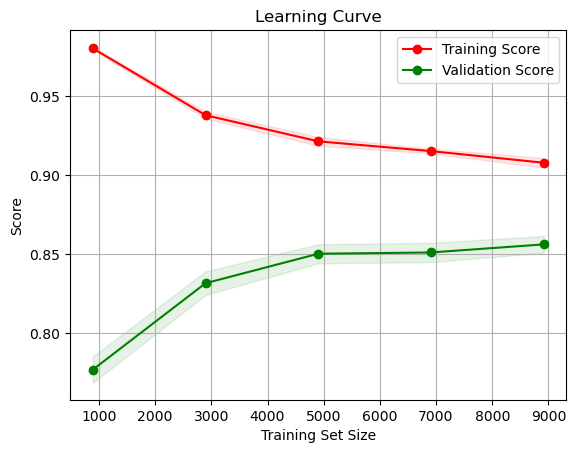

In [25]:
X, y = X_train, y_train

model = XGBClassifier()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Validation Score")
plt.legend(loc="best")

plt.show()

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [27]:
rfc.score(X_test, y_test)

0.8388447048974467

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
rf_matrix = confusion_matrix(y_true = y_test, y_pred = rfc_pred)

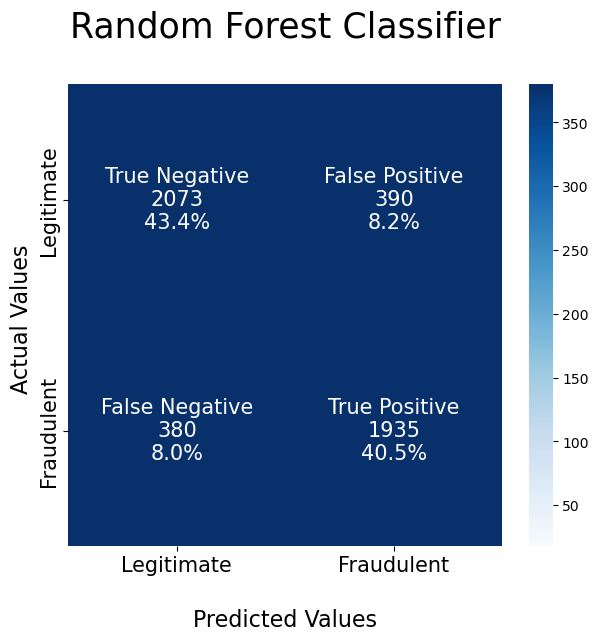

In [30]:
plot_matrix(rf_matrix,'Random Forest Classifier','Blues')

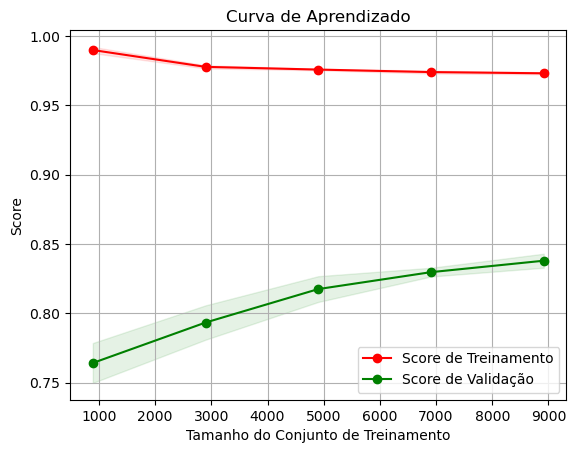

In [31]:
X, y = X_train, y_train

model = RandomForestClassifier()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

# SVM

In [32]:
from sklearn.svm import SVC

svc = SVC(C=1, kernel='rbf').fit(X_train, y_train)

In [33]:
r2_svc = svc.score(X_test, y_test)

In [34]:
svc_predict = svc.predict(X_test)

In [35]:
r2_svc

0.714524905818334

In [36]:
svc_matrix = confusion_matrix(y_true = y_test, y_pred = svc_predict)

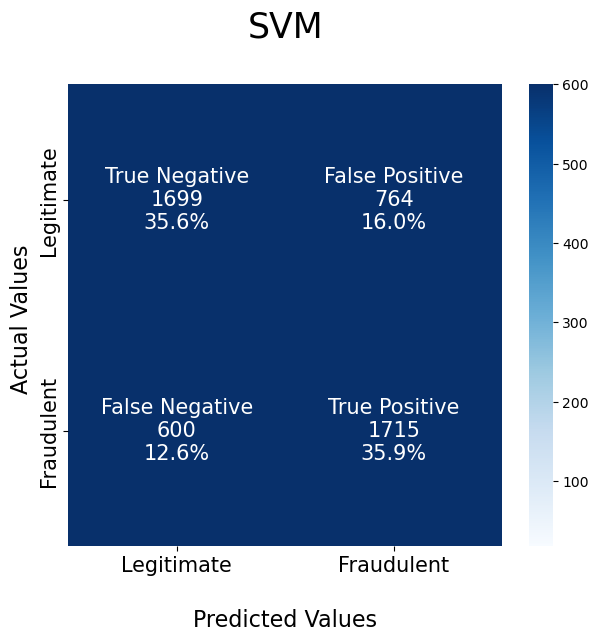

In [37]:
plot_matrix(svc_matrix,'SVM','Blues')

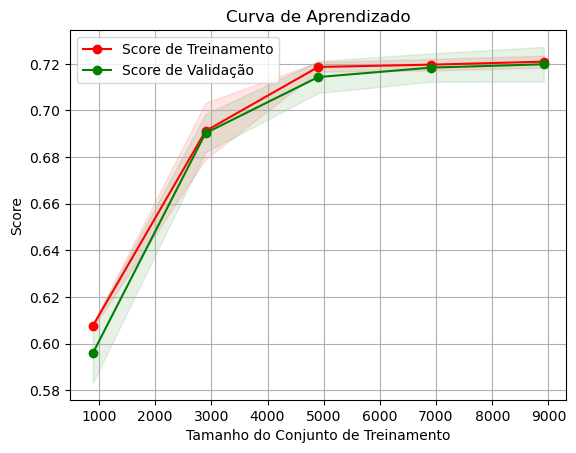

In [38]:
X, y = X_train, y_train

# Definir o modelo de aprendizado de máquina
model = SVC()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

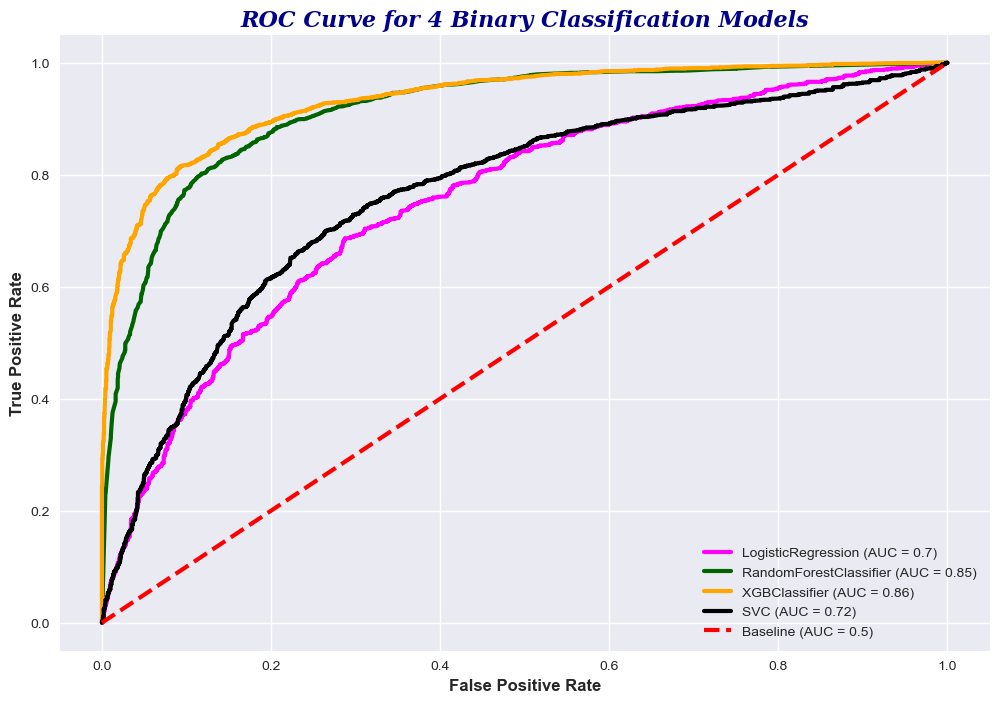

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(reg, X_test, y_test, color='magenta', linewidth=3, ax=ax, label='LogisticRegression (AUC = 0.7)')
plot_roc_curve(rfc, X_test, y_test, color='darkgreen', linewidth=3, ax=ax, label='RandomForestClassifier (AUC = 0.85)')
plot_roc_curve(xgb_class, X_test, y_test, color='orange', linewidth=3, ax=ax, label='XGBClassifier (AUC = 0.86)')
plot_roc_curve(svc, X_test, y_test, color='black', linewidth=3, ax=ax, label='SVC (AUC = 0.72)')
plt.plot([0, 1], [0, 1], ls='--', color='red', linewidth=3, label='Baseline (AUC = 0.5)')
ax.legend(loc='lower right')
ax.set_title('ROC Curve for 4 Binary Classification Models', fontdict=font1)
ax.set_xlabel('False Positive Rate', fontdict=font2)
ax.set_ylabel('True Positive Rate', fontdict=font2)
plt.show()